# Alloy Design and Prediction Using Machine Learning

This notebook demonstrates the implementation of machine learning techniques for predicting alloy properties based on composition.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alloy_ml_prediction import AlloyPredictor

## 1. Load and Explore Data

In [6]:
# Initialize predictor
predictor = AlloyPredictor()

# Load data
X, y = predictor.load_alloy_data('../data/sample_data.csv')

# Display first few rows
print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,C1,C2,C3,C4,C5
0,0.20,0.20,0.20,0.20,0.20
1,0.25,0.25,0.25,0.15,0.10
2,0.30,0.20,0.20,0.15,0.15
3,0.15,0.25,0.20,0.20,0.20
4,0.10,0.30,0.20,0.20,0.20



Target (y):


0    300
1    320
2    340
3    290
4    310
Name: HV, dtype: int64

## 2. K-Fold Cross-Validation Analysis

In [7]:
# Perform k-fold analysis
results = predictor.perform_kfold_analysis(X, y, n_splits=5)

# Display results
print("K-fold Analysis Results:")
for fold in results['fold_results']:
    print(f"\nFold {fold['fold']}:")
    print(f"Training RMSE: {fold['rmse_train']:.4f}")
    print(f"Testing RMSE: {fold['rmse_test']:.4f}")
    print(f"Training R²: {fold['r2_train']:.4f}")
    print(f"Testing R²: {fold['r2_test']:.4f}")

K-fold Analysis Results:

Fold 1:
Training RMSE: 11.7482
Testing RMSE: 14.3372
Training R²: 0.5173
Testing R²: -31.8889

Fold 2:
Training RMSE: 11.7742
Testing RMSE: 10.8662
Training R²: 0.4005
Testing R²: -17.8920

Fold 3:
Training RMSE: 11.7770
Testing RMSE: 9.2755
Training R²: 0.3473
Testing R²: 0.4494

Fold 4:
Training RMSE: 1.7629
Testing RMSE: 38.8165
Training R²: 0.9875
Testing R²: -8.6430

Fold 5:
Training RMSE: 9.5339
Testing RMSE: 18.8480
Training R²: 0.5845
Testing R²: -5.3155


## 3. Compare Analytical and Gradient Descent Solutions

In [8]:
# Get coefficients from both methods
analytical_coef = predictor.analytical_solution(X, y)
gradient_coef = predictor.gradient_descent(X, y)

print("Coefficient Comparison:")
print("Analytical Solution:", analytical_coef)
print("Gradient Descent:", gradient_coef)

Coefficient Comparison:
Analytical Solution: [ 1278.75   -1087.5     -955.9375  -565.625   -756.5625  -515.    ]
Gradient Descent: [261.45189652  59.96969993  57.09872123  50.41723421  45.07991652
  46.56972132]


## 4. Visualize Gradient Descent Convergence

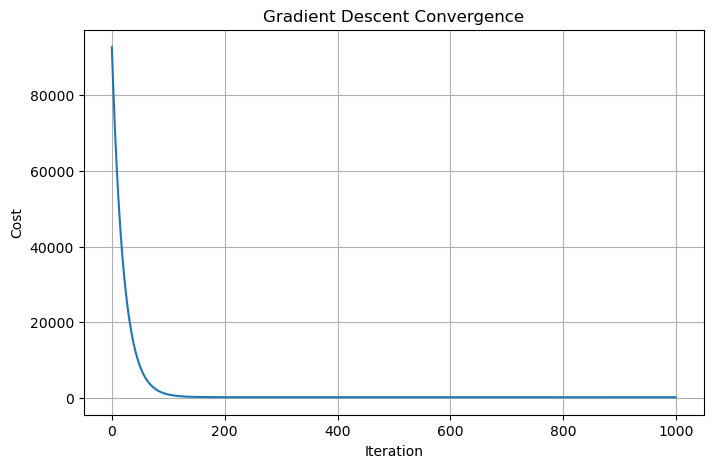

In [9]:
# Plot convergence
predictor.plot_convergence(X, y)